In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split


多个模型集成的模型叫做集成评估器(ensemble estimator),组合集成评估器的每个模型叫做基评估器(base estimator)
# 三类集成算法
## 装袋法 Bagging(randomForest)
多个相互独立的评估器，对其预测进行平均或者多数表决原则来集成评估器结果。
## 提升法 Boosting(Adaboost,GBDT梯度提升树)
基评估器是相关的，按照顺序构建，核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器。
## stacking

# RandomForestClassifier

## 重要参数

### 控制基评估器的参数
1. criterion:不纯度的衡量指标，gini,entropy
2. max_depth：树的最大深度
3. min_samples_leaf:一个节点分支之后每个节点都至少包含的训练样本，否则分支不会发生，最后一层节点的最小值
4. min_samples_split:一个节点至少包含的训练样本才允许被分支，树的倒数第二层节点的最小值
5. max_features:限制分支时考虑的特征个数
6. min_impurity_decrease:限制信息增益的大小，小于这个数值分支不会发生

### 控制森林参数

#### n_estimators: 
森林里数目个数，基评估器数量，越大模型效果越好

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
xtrain,xtest,ytrain,ytest = train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=30)
rfc = RandomForestClassifier(random_state=30)
clf.fit(xtrain,ytrain)
rfc.fit(xtrain,ytrain)
score_c= clf.score(xtest,ytest)
score_r = rfc.score(xtest,ytest)
print('single tree:{},random forest:{}'.format(score_c,score_r))

single tree:0.9259259259259259,random forest:1.0


In [5]:
from sklearn.model_selection import cross_val_score

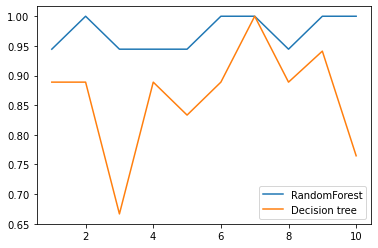

In [6]:
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),rfc_s,label='RandomForest')
plt.plot(range(1,11),clf_s,label='Decision tree')
plt.legend()
plt.show()

RandomForest mean score is 0.9722222222222221
DecisionTree mean score is 0.8539215686274509


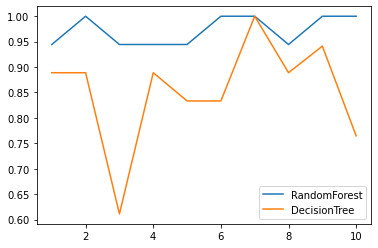

In [7]:
label = 'RandomForest'
for model in[RandomForestClassifier(n_estimators=25,random_state=30)
             ,DecisionTreeClassifier(random_state=30)]:
    score = cross_val_score(model,wine.data,wine.target,cv=10)
    print('{} mean score is {}'.format(label,score.mean()))
    plt.plot(range(1,11),score,label=label)
    plt.legend()
    label='DecisionTree'

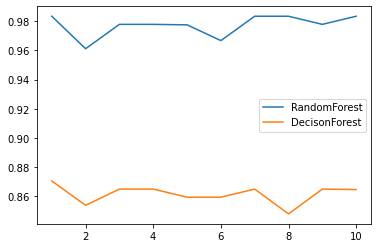

CPU times: total: 2.39 s
Wall time: 2.4 s


In [15]:
%%time
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)

plt.plot(range(1,11),rfc_l,label='RandomForest')
plt.plot(range(1,11),clf_l,label='DecisonForest')
plt.legend()
plt.show()

0.9888888888888889 16


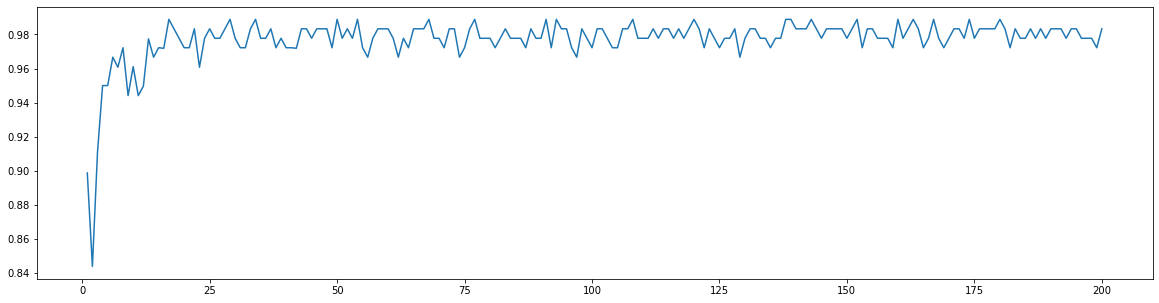

CPU times: total: 3min 13s
Wall time: 3min 15s


In [12]:
%%time
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

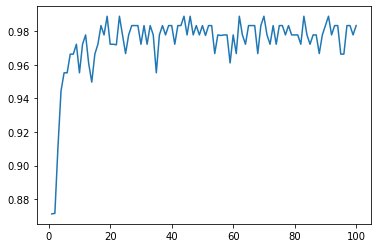

CPU times: total: 1min
Wall time: 58.4 s


In [18]:
%%time
superpa = []
for i in range(100):
    rfc = RandomForestClassifier(n_estimators = i+1,n_jobs=-1)
    rfc_l = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_l)
    pass
plt.plot(range(1,101),superpa)
plt.show()
    

In [26]:
import numpy as np
from scipy.special import comb #求组合数C
np.array([comb(25,i)*(0.2**i)*(0.8**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

#### random_state
1. 决策树里的random_state控制生成一种树，从最重要的特征里随机选择一个来进行分支
2. 随机森林里的random_state控制生成一种森林，而不是让一个森林里只有一种树

In [27]:
rfc =RandomForestClassifier(n_estimators=25,random_state=2)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=25, random_state=2)

In [35]:
# estimators查看森林中树的情况
rfc.estimators_
#可以看到，虽然随机森林random_state固定，
#但是随机森林里每个树依然不一样，有自己的random_state


[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511),
 DecisionTreeClassifier(max_features='auto', random_state=1418777250),
 DecisionTreeClassifier(max_features='auto', random_state=663257521),
 DecisionTreeClassifier(max_features='auto', random_state=878959199),
 DecisionTreeClassifier(max_features='auto', random_state=854108747),
 DecisionTre

#### bootstrap & oob_score

1. bootstrap：
* 默认为True,代表有放回的抽样，从n个样本的原始训练集中每次采样一个样本然后放回，n次之后获得一个新的样本集叫自助集,一般来说，自助集大约包含63%的原始数据：
* 每一个样本被抽到某个自助集的概率为$$1 - ( 1 - \frac { 1 } { n } ) ^ { n }$$
* 当n足够大时，这个收敛于$$1-(\frac{1}{e})$$
* 浪费的37%数据称为袋外数据（out of bag data/oob）

2. oob_score：
* 使用随机森林时候，当n和n_estimators都够大的时候，就会产生袋外数据，我们就可以把这些数据当作测试集来测试模型，这时候需要将oob_score设置为True，训练结束就可以通过oob_score_来查看测试结果

In [47]:
# 无需划分训练集和测试集合
rfc_t = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc_t.fit(wine.data,wine.target)
rfc_f = RandomForestClassifier(n_estimators=25,oob_score=False)
rfc_f.fit(xtrain,ytrain)
# 属性oob_score_
print('oob_score=True:{},oob_socre=False:{}'.format(rfc_t.oob_score_,rfc_f.score(xtest,ytest)))

oob_score=True:0.9719101123595506,oob_socre=False:1.0


In [48]:
rfc_t.feature_importances_

array([0.12385632, 0.02224859, 0.00704768, 0.05632969, 0.01469896,
       0.03921261, 0.12289641, 0.00555825, 0.00666051, 0.18444036,
       0.08740559, 0.14554043, 0.1841046 ])

In [58]:
importances = rfc_t.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(xtrain.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, wine.feature_names[indices[f]], importances[indices[f]]))


 1) color_intensity                0.184440
 2) proline                        0.184105
 3) od280/od315_of_diluted_wines   0.145540
 4) alcohol                        0.123856
 5) flavanoids                     0.122896
 6) hue                            0.087406
 7) alcalinity_of_ash              0.056330
 8) total_phenols                  0.039213
 9) malic_acid                     0.022249
10) magnesium                      0.014699
11) ash                            0.007048
12) proanthocyanins                0.006661
13) nonflavanoid_phenols           0.005558


In [57]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [65]:
rfc.apply(xtest)

array([[20,  9,  5, ..., 12, 10,  5],
       [24,  4, 17, ...,  4, 23,  9],
       [24, 15, 23, ..., 21, 23,  9],
       ...,
       [ 8,  4, 11, ...,  4,  4,  9],
       [29, 26, 23, ..., 22, 21, 15],
       [11,  9, 11, ..., 15,  4,  9]], dtype=int32)

In [60]:
rfc.predict(xtest)

array([2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1,
       0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0,
       2, 0, 0, 2, 0, 1, 0, 1, 0, 1])

In [63]:
rfc.predict_proba(xtest)

array([[0.04, 0.24, 0.72],
       [0.08, 0.92, 0.  ],
       [0.84, 0.16, 0.  ],
       [0.8 , 0.16, 0.04],
       [0.  , 1.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.04, 0.12, 0.84],
       [0.  , 0.  , 1.  ],
       [0.08, 0.92, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.08, 0.8 , 0.12],
       [1.  , 0.  , 0.  ],
       [0.08, 0.88, 0.04],
       [0.08, 0.92, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.84, 0.12, 0.04],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.08, 0.92],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.  , 0.04],
       [0.04, 0.08, 0.88],
       [0.  , 1.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.04, 0.04, 0.92],
       [0.  , 0.  , 1.  ],
 

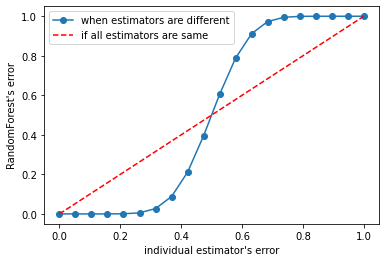

In [67]:
import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

In [82]:
for i in rfc.estimators_:
    print(i.score(xtest,ytest))

0.8888888888888888
0.9074074074074074
1.0
1.0
0.9814814814814815
0.9629629629629629
1.0
0.8703703703703703
0.9259259259259259
0.9629629629629629
0.9259259259259259
0.9444444444444444
0.9814814814814815
0.9074074074074074
0.9259259259259259
0.9629629629629629
0.9074074074074074
1.0
0.9629629629629629
1.0
0.9629629629629629
0.9259259259259259
0.9814814814814815
0.9444444444444444
0.9074074074074074


# RandomForestRegressor

## 重要参数，属性与接口

### criterion

1. squared_error: 样本真实数据与回归结果的差值
均方误差，父子节点之间的均方误差的差额被用来作为特征选择标准，通过使用叶子节点的均值来最小化L2误差
$$ f _ { i }：模型回归出的数值$$
$$y _ { i }: 样本点实际的数值标签$$
$$\hat{y}: 真实数据标签的平均数$$
$$M S E = \frac { 1 } { N } \sum _ { i = 1 } ^ { N } ( f _ { i } - y _ { i } ) ^ { 2 }$$
回归树的score接口返回的是R平方（可以为正为负，但是必须小于1），而不是MSE（永远为正）
$$R ^ { 2 } = 1 - \frac { u } { v }$$
$$u = \sum _ { i = 1 } ^ { N } ( f _ { i } - y _ { i } ) ^ { 2 }$$
$$v = \sum _ { i = 1 } ^ { N } ( y _ { i } - \hat{y} ) ^ { 2 }$$

2. frideman_mse:
使用费尔德曼均方误差
3. absolute_error：
绝对平均误差，使用叶节点的中值来最小化L1损失
4. poisson
利用泊松偏差的减少来查找分裂

In [89]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor,boston.data,boston.target,cv=10
                ,scoring='neg_mean_squared_error')    #不指定的话默认是R平方      

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

### 模型评价指标

In [117]:
# sklearn中的模型评估指标:scoring
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [91]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [97]:
data = pd.DataFrame(boston.data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [99]:
target = pd.DataFrame(boston.target)
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [102]:
df = pd.concat([data,target],axis=1)

In [113]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT','PRICE']

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']

In [114]:
df.columns = columns

In [115]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 使用SimpleInputer填补缺失值

In [118]:
# 导入需要的库
from sklearn.impute import SimpleImputer


In [124]:
# 以boston数据为例

import warnings
warnings.filterwarnings('ignore')
dataset = load_boston()
dataset.data.shape

(506, 13)

In [126]:
x_full,y_full = dataset.data,dataset.target
n_samples = x_full.shape[0]
n_features = x_full.shape[1]
print(n_samples,n_features)

506 13


In [127]:
# 为完整数据集放入缺失值
# np.floor 向下取整，返回浮点数
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_features*n_samples*missing_rate))

In [128]:
n_missing_samples

3289

In [130]:
# 创造随机遍布在行列中的缺失值，随机生成行列索引
missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)
len(missing_features)
# 如何需要的缺失值个数小于原本样本量的个数，那么就可以用random.choice来随机抽取不重复的随机数
# missing_samples = rng.choice(n_samples,n_missing_samples,replace=False)

3289

In [134]:
#创造缺失值
x_missing = x_full.copy()
y_missing = y_full.copy()
x_missing[missing_samples,missing_features] = np.nan
x_missing

array([[       nan,        nan,        nan, ...,        nan, 3.9690e+02,
        4.9800e+00],
       [       nan, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
               nan],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ...,        nan,        nan,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00,        nan, ..., 2.1000e+01,        nan,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00,        nan, ...,        nan, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01,        nan,
               nan]])

In [136]:
# 矩阵转为DataFrame
x_missing = pd.DataFrame(x_missing)
x_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,0.538,6.575,NaN,NaN,1.0,296.0,NaN,396.90,4.98
1,NaN,0.0,7.07,0.0,NaN,6.421,NaN,4.9671,2.0,NaN,17.8,396.90,NaN
2,0.02729,0.0,7.07,0.0,0.469,NaN,NaN,NaN,2.0,242.0,NaN,NaN,4.03
3,0.03237,NaN,NaN,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,54.2,NaN,NaN,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,0.0,NaN,0.0,0.573,NaN,NaN,NaN,1.0,NaN,21.0,391.99,NaN
502,0.04527,0.0,11.93,NaN,NaN,6.120,76.7,2.2875,NaN,273.0,21.0,NaN,9.08
503,0.06076,0.0,NaN,0.0,0.573,NaN,91.0,NaN,NaN,273.0,21.0,NaN,5.64
504,0.10959,0.0,NaN,NaN,0.573,6.794,89.3,2.3889,1.0,273.0,NaN,393.45,6.48


In [142]:
# 使用均值填充
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
x_missing_mean =imp_mean.fit_transform(x_missing)


In [145]:
# 使用0填充
imp_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
x_missing_0 = imp_0.fit_transform(x_missing)
pd.DataFrame(x_missing_0).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [187]:
# 使用随机森林回归值填充
# 把标签放到特征矩阵里，把含缺失值的特征矩阵某一列当作标签来预测
# 如果多列含有缺失值，从缺失值最少的开始预测填充
x_missing_reg = x_missing.copy()
x_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,0.538,6.575,NaN,NaN,1.0,296.0,NaN,396.90,4.98
1,NaN,0.0,7.07,0.0,NaN,6.421,NaN,4.9671,2.0,NaN,17.8,396.90,NaN
2,0.02729,0.0,7.07,0.0,0.469,NaN,NaN,NaN,2.0,242.0,NaN,NaN,4.03
3,0.03237,NaN,NaN,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,54.2,NaN,NaN,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,0.0,NaN,0.0,0.573,NaN,NaN,NaN,1.0,NaN,21.0,391.99,NaN
502,0.04527,0.0,11.93,NaN,NaN,6.120,76.7,2.2875,NaN,273.0,21.0,NaN,9.08
503,0.06076,0.0,NaN,0.0,0.573,NaN,91.0,NaN,NaN,273.0,21.0,NaN,5.64
504,0.10959,0.0,NaN,NaN,0.573,6.794,89.3,2.3889,1.0,273.0,NaN,393.45,6.48


In [184]:
# 找缺失值从小到大排列的特征的顺序,找到排序后的索引
sortindex = np.argsort(x_missing_reg.isnull().sum()).values
sortindex

array([ 2,  7,  8,  6,  0,  5, 11,  4,  9, 10, 12,  3,  1], dtype=int32)

In [197]:
for i in sortindex:
    # 构建新特征矩阵和新标签
    df = x_missing_reg
    fillc = df.iloc[:,i]
    df =  pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    
    # 在特征矩阵中对缺失值按0补充
    df_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
    
    #找出训练集和测试集
    ytrain = fillc[fillc.notnull()]
    ytest = fillc[fillc.isnull()]
    xtrain = df_0[ytrain.index,:]
    xtest = df_0[ytest.index,:]
    
    # 用随机森林来填补缺失值
    rfc = RandomForestRegressor(n_estimators=25)
    rfc = rfc.fit(xtrain,ytrain)
    ypredct = rfc.predict(xtest)
    
    #填补好的特征返回我们原始特征矩阵中
    x_missing_reg.iloc[x_missing_reg.iloc[:,i].isnull(),i] = ypredct
    

In [198]:
x_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.300363,0.00,8.8976,0.00,0.538000,6.57500,52.888,4.219152,1.00,296.00,19.324,396.9000,4.9800
1,0.096228,0.00,7.0700,0.00,0.438856,6.42100,36.468,4.967100,2.00,254.80,17.800,396.9000,7.7288
2,0.027290,0.00,7.0700,0.00,0.469000,7.32320,44.832,4.486868,2.00,242.00,17.736,393.7156,4.0300
3,0.032370,13.64,4.1696,0.00,0.458000,6.99800,45.800,6.062200,3.00,222.00,18.700,394.6300,5.6140
4,0.035860,0.00,2.1800,0.00,0.452448,7.14700,54.200,6.011036,3.24,222.00,18.700,396.9000,5.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.313372,0.00,14.3832,0.00,0.573000,6.20244,54.700,3.214028,1.00,276.12,21.000,391.9900,8.5184
502,0.045270,0.00,11.9300,0.00,0.564440,6.12000,76.700,2.287500,4.04,273.00,21.000,359.6972,9.0800
503,0.060760,0.00,15.0152,0.00,0.573000,6.20232,91.000,3.229348,3.60,273.00,21.000,391.1988,5.6400
504,0.109590,0.00,11.8848,0.04,0.573000,6.79400,89.300,2.388900,1.00,273.00,18.244,393.4500,6.4800


In [201]:
# 填好数据后进行建模，得到mse结果
x = [x_full,x_missing_mean,x_missing_0,x_missing_reg]
mse = []
std = []
for x in x:
    estimator = RandomForestRegressor(random_state=0,n_estimators=100)
    score = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error',cv=5).mean()
    mse.append(score*-1)
 

In [202]:
mse

[21.571667100368845, 52.568056917394664, 44.611395707183064, 18.27120273597359]

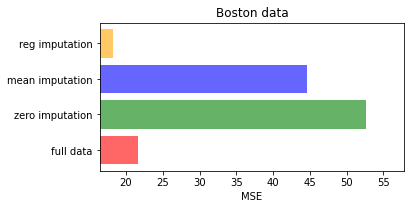

In [207]:
x_labels = ['full data',
           'zero imputation',
           'mean imputation',
           'reg imputation']
colors = ['r','g','b','orange']
plt.figure(figsize=(12,6))
ax = plt.subplot(221)
for i in np.arange(len(mse)):
    ax.barh(i,mse[i],color=colors[i],alpha=0.6,align='center')
ax.set_title('Boston data')
ax.set_xlim(left = np.min(mse)*0.9,right=np.max(mse)*1.1)
ax.set_xlabel('MSE')
ax.set_yticks(np.arange(len(mse)))
ax.set_yticklabels(x_labels)
plt.show()

# 机器学习调参基本思想

## 找目标

* 泛化误差：衡量模型在未知数据上的准确率的指标

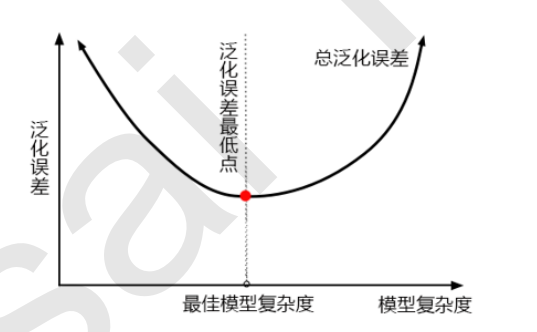

一个集成模型f 在未知数据集D上的泛化误差E，由方差var，偏差bias，和噪声$ε$共同决定
$$E ( f ; D ) = b i a s ^ { 2 } ( x ) + v a r ( x ) + ε ^ { 2 }$$

* 偏差和方差：模型的准确率和稳定性
每个点是基评估器产生的预测结果，红线为预测值的均值，蓝线为本来的数据
偏差：红点到蓝线的距离均值
方差：红点到红线的距离

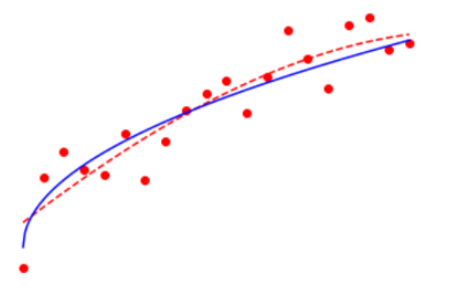

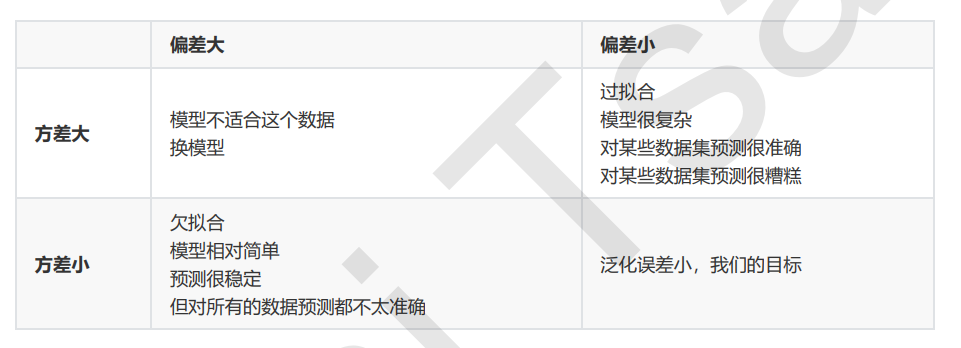